In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image as Image
image = Image.open('/Users/motong 1/Downloads/shoe.jpg')
image_array = np.array(image)

In [7]:
print(image_array.shape)
print(image_array.dtype)

(333, 500, 3)
uint8


In [8]:
w_r = tf.placeholder(shape=[None,None], dtype=tf.float32)
w_g = tf.placeholder(shape=[None,None], dtype=tf.float32)
w_b = tf.placeholder(shape=[None,None], dtype=tf.float32)

In [9]:
w_rgb = tf.stack([w_r, w_g, w_b], axis=2)
print(w_rgb)

Tensor("stack:0", shape=(?, ?, 3), dtype=float32)


In [10]:
w_expand = tf.expand_dims(w_rgb, axis=-1)
#w_expand = tf.expand_dims(w_expand, axis=3)

In [11]:
print(w_expand)

Tensor("ExpandDims:0", shape=(?, ?, 3, 1), dtype=float32)


In [13]:
x = tf.placeholder(shape=[None, None, 3], dtype=tf.uint8)
inp = tf.to_float(x)
#inp = inp/255 * 2 -1.0

In [14]:
inp = tf.expand_dims(inp, axis=0)

In [15]:
output = tf.nn.conv2d(inp, w_expand, strides=[1,1,1,1], padding='VALID')

In [16]:
w_r_value = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype=float)
w_g_value = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype=float)
w_b_value = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype=float)

In [18]:
sess = tf.Session()

In [19]:
output_value = sess.run(output, feed_dict = {x:image_array,
                                            w_r:w_r_value,
                                            w_g:w_g_value,
                                            w_b:w_b_value})

In [20]:
print(output_value.shape)

(1, 331, 498, 1)


In [21]:
output_pic = np.squeeze(output_value)

In [22]:
print(output_pic.shape)

(331, 498)


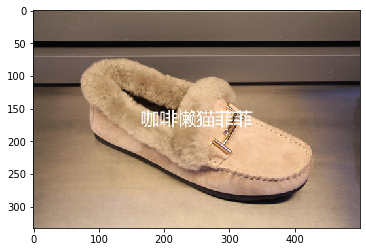

In [23]:
plt.imshow(image)

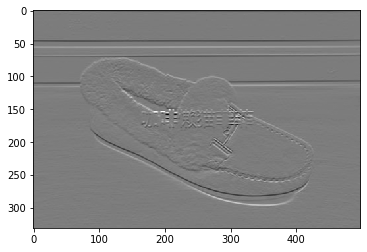

In [24]:
plt.imshow(output_pic,cmap='gray')

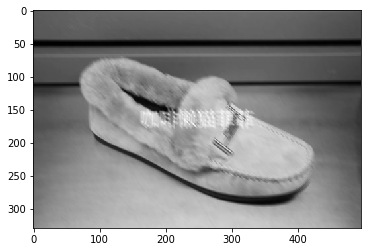

In [25]:
w_r_value = np.array([[0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0]], dtype=float)
w_g_value = np.array([[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]], dtype=float)
w_b_value = np.array([[0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0]], dtype=float)
w_value, output_value = sess.run([w_expand,output], feed_dict = {x:image_array,
                                            w_r:w_r_value,
                                            w_g:w_g_value,
                                            w_b:w_b_value})
plt.imshow(np.squeeze(output_value),cmap='gray')

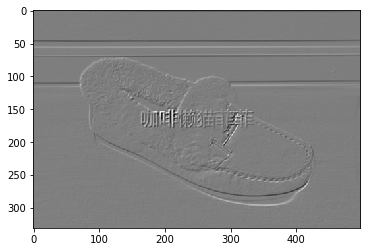

In [26]:
w_r_value = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype=float)
w_g_value = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype=float)
w_b_value = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype=float)
output_value = sess.run(output, feed_dict = {x:image_array,
                                            w_r:w_r_value,
                                            w_g:w_g_value,
                                            w_b:w_b_value})
w_r_value = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype=float)
w_g_value = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype=float)
w_b_value = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype=float)
output_value2 = sess.run(output, feed_dict = {x:image_array,
                                            w_r:w_r_value,
                                            w_g:w_g_value,
                                            w_b:w_b_value})
plt.imshow(np.squeeze(output_value+output_value2),cmap='gray')


In [40]:
import sys


x_mock = np.array(range(300))
x_mock = x_mock.reshape([10,10,3])

w_r_value = np.array([[1,0,0], [0,1,0], [0,0,1]], dtype=float)
w_g_value = np.array([[0,1,0], [0,1,0], [0,1,0]], dtype=float)
w_b_value = np.array([[0,0,0], [1,1,1], [0,0,0]], dtype=float)

kernel = np.stack([w_r_value, w_g_value, w_b_value], axis=2)
for depth in range(3):
    for height in range(10-2):
        for width in range(10-2):
            print(x_mock[height][width][depth], end='\t')
        print('')
    print('----------')

for depth in range(3):
    for height in range(3):
        for width in range(3):
            print(kernel[height][width][depth], end='\t')
        print('')
    print('----------')
output_numpy = np.zeros([8,8])
for height in range(10-2):
    for width in range(10-2):
        along_depth_sum = 0
        for depth in range(3):
            depth_result = (x_mock[height:height+3, width:width+3, depth] * kernel[depth]).sum()
            along_depth_sum += depth_result
        output_numpy[height][width] = along_depth_sum

for height in range(10-2):
    for width in range(10-2):
        print(output_numpy[height][width], end='\t')
    print('')


0	3	6	9	12	15	18	21	
30	33	36	39	42	45	48	51	
60	63	66	69	72	75	78	81	
90	93	96	99	102	105	108	111	
120	123	126	129	132	135	138	141	
150	153	156	159	162	165	168	171	
180	183	186	189	192	195	198	201	
210	213	216	219	222	225	228	231	
----------
1	4	7	10	13	16	19	22	
31	34	37	40	43	46	49	52	
61	64	67	70	73	76	79	82	
91	94	97	100	103	106	109	112	
121	124	127	130	133	136	139	142	
151	154	157	160	163	166	169	172	
181	184	187	190	193	196	199	202	
211	214	217	220	223	226	229	232	
----------
2	5	8	11	14	17	20	23	
32	35	38	41	44	47	50	53	
62	65	68	71	74	77	80	83	
92	95	98	101	104	107	110	113	
122	125	128	131	134	137	140	143	
152	155	158	161	164	167	170	173	
182	185	188	191	194	197	200	203	
212	215	218	221	224	227	230	233	
----------
1.0	0.0	0.0	
0.0	1.0	0.0	
0.0	0.0	1.0	
----------
0.0	1.0	0.0	
0.0	1.0	0.0	
0.0	1.0	0.0	
----------
0.0	0.0	0.0	
1.0	1.0	1.0	
0.0	0.0	0.0	
----------
306.0	333.0	360.0	387.0	414.0	441.0	468.0	495.0	
576.0	603.0	630.0	657.0	684.0	711.0	738.0	765.0	
846.0	873.0	900.0	9

In [42]:
w_r_value = np.array([[1,0,0], [0,1,0], [0,0,1]], dtype=float)
w_g_value = np.array([[0,1,0], [0,1,0], [0,1,0]], dtype=float)
w_b_value = np.array([[0,0,0], [1,1,1], [0,0,0]], dtype=float)

In [43]:
0+33+66 + 4+34+64 + 32+35+38

306

In [44]:
3+36+69 + 7+37+67 + 35+38+41

333

In [45]:
w_value, output_value = sess.run([w_expand,output], feed_dict = {x:x_mock,
                                            w_r:w_r_value,
                                            w_g:w_g_value,
                                            w_b:w_b_value})
#print(x_mock)

In [46]:
print(w_value.squeeze().transpose([2,1,0]))
print(x_mock.transpose([2,1,0]))
output_value = output_value.squeeze()
for height in range(10-2):
    for width in range(10-2):
        print(output_value[height][width], end='\t')
    print('')

[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[0. 0. 0.]
  [1. 1. 1.]
  [0. 0. 0.]]

 [[0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]]
[[[  0  30  60  90 120 150 180 210 240 270]
  [  3  33  63  93 123 153 183 213 243 273]
  [  6  36  66  96 126 156 186 216 246 276]
  [  9  39  69  99 129 159 189 219 249 279]
  [ 12  42  72 102 132 162 192 222 252 282]
  [ 15  45  75 105 135 165 195 225 255 285]
  [ 18  48  78 108 138 168 198 228 258 288]
  [ 21  51  81 111 141 171 201 231 261 291]
  [ 24  54  84 114 144 174 204 234 264 294]
  [ 27  57  87 117 147 177 207 237 267 297]]

 [[  1  31  61  91 121 151 181 211 241 271]
  [  4  34  64  94 124 154 184 214 244 274]
  [  7  37  67  97 127 157 187 217 247 277]
  [ 10  40  70 100 130 160 190 220 250 280]
  [ 13  43  73 103 133 163 193 223 253 283]
  [ 16  46  76 106 136 166 196 226 256 286]
  [ 19  49  79 109 139 169 199 229 259 289]
  [ 22  52  82 112 142 172 202 232 262 292]
  [ 25  55  85 115 145 175 205 235 265 295]
  [ 28  58  88 118 148 178 208 238 268 

In [47]:
0+33+66 + 31+34+37+5+35+65

306

In [48]:
print(0+33+66 + 4+34+64 + 32+35+38)
print(30+63+96 + 34+64+94 + 62+65+68)

306
576


In [49]:
30+63+96+35+65+95+61+64+67

576

In [50]:


x = tf.placeholder([None, None, None, 3], dtype=tf.float32)
W = tf.Variable(tf.truncated_normal([3, 3, 3, 32], stddev=0.1))
b = tf.Variable(tf.zeros([32]))
logits = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME') + b
output = tf.nn.relu(logits)


tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

TypeError: placeholder() got multiple values for argument 'dtype'